In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
import numpy as np
from keras.datasets import mnist
from tensorflow.keras.layers import Flatten,Dense
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print(y_test)
len(x_train[0])

[7 2 1 ... 4 5 6]


28

In [4]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)

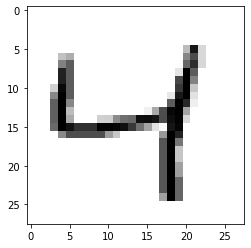

In [5]:
plt.imshow(x_train[2],cmap='binary')

In [6]:
print(y_train[2])

4


In [7]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_train=x_train.reshape(-1,28,28,1)
x_train.shape

(60000, 28, 28, 1)

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout

In [9]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=x_train[0].shape))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
model.fit(x_train,y_train,epochs=12)

Epoch 1/12
1875/1875 [==============================] - 45s 24ms/step - loss: 0.7865 - accuracy: 0.7393
Epoch 2/12
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1491 - accuracy: 0.9573
Epoch 3/12
1875/1875 [==============================] - 44s 24ms/step - loss: 0.1078 - accuracy: 0.9698
Epoch 4/12
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0796 - accuracy: 0.9766
Epoch 5/12
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0678 - accuracy: 0.9802
Epoch 6/12
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0595 - accuracy: 0.9828
Epoch 7/12
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0522 - accuracy: 0.9852
Epoch 8/12
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0450 - accuracy: 0.9870
Epoch 9/12
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0436 - accuracy: 0.9871
Epoch 10/12
1875/1875 [==============================] - 44s 24m

In [11]:
model.save('cnndigitexercise.model')

INFO:tensorflow:Assets written to: cnndigitexercise.model/assets


In [12]:
x_test=tf.keras.utils.normalize(x_test,axis=1)
x_test=x_test.reshape(-1,28,28,1)
predict=model.predict(x_test)

In [19]:
digit=np.argmax(predict[1])
print(digit)

2


In [20]:
y_test[1]

2